# Phân tích biến đổi khí hậu qua nhiêt độ bề mặt Trái Đất:

In [25]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

# I. Sự biến đổi nhiệt độ xét trên phạm vi toàn cầu:

## 1. Xử lý dữ liệu:

In [73]:
# Đọc thông tin dữ liệu
global_data = pd.read_csv("GlobalTemperatures.csv")

In [74]:
global_data.head(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [75]:
# Lưu bản dữ liệu gốc trong bộ nhớ
copy = global_data.copy()

<AxesSubplot: >

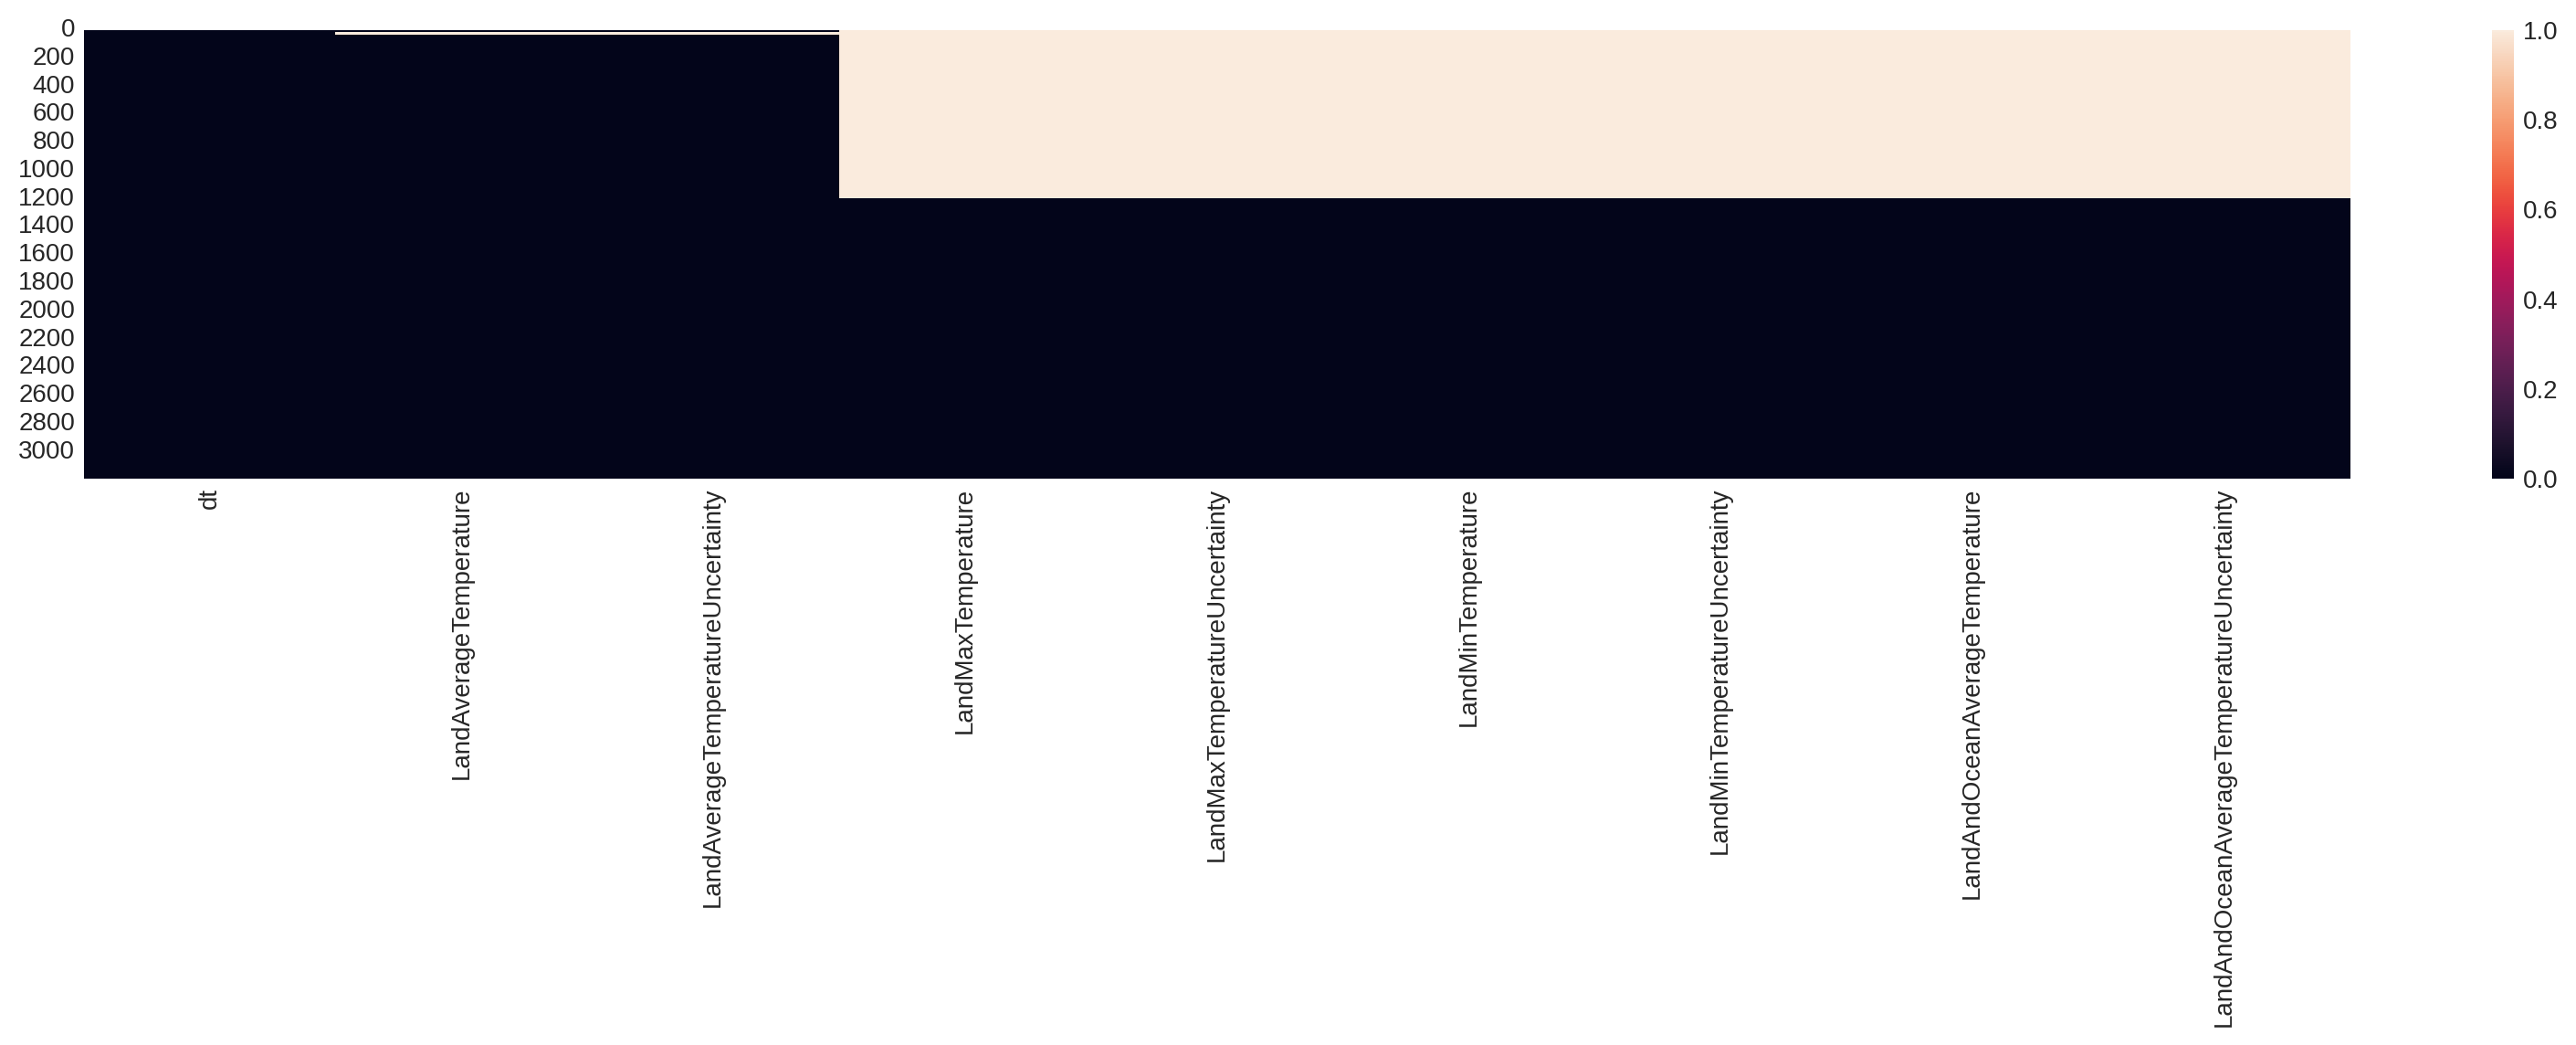

In [76]:
# Xem phân bố các dữ liệu bị thiếu
global_data.isna().sum() # có 1200 điểm dữ liệu bị thiếu các trường thông tin Max, Min and Land&Ocean Average Temp
plt.figure(figsize = (16, 3))
sns.heatmap(global_data.isna())

In [77]:
# Loại bỏ dữ liệu bị thiếu trường thông tin quan trọng
global_data.dropna(axis = 0, inplace = True)

In [78]:
# Xử lý trường thời gian
global_data['Date'] = pd.to_datetime(global_data.dt) # chuyển về chung một kiểu dữ liệu thời gian

global_data2 = global_data.copy()
global_data2.drop(columns = ['dt'], axis = 1, inplace = True) # loại bỏ trường thời gian cũ 

# Tạo các trường thời gian mới
global_data2['day'] = global_data2['Date'].dt.day
global_data2['week'] = global_data2['Date'].dt.isocalendar().week
global_data2['month'] = global_data2['Date'].dt.month
global_data2['year'] = global_data2['Date'].dt.year

# Nhóm dữ liệu lại theo từng năm để giảm nhiễu do dữ liệu bị thiếu
earth_data = global_data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.sample(5)

year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
150  2000                9.201167                           0.083500   
80   1930                8.633583                           0.239667   
95   1945                8.584833                           0.220333   
81   1931                8.719250                           0.237750   
11   1861                7.846500                           0.653417   

     LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
150           14.898833                       0.122667            3.581833   
80            14.326250                       0.243583            2.740000   
95            14.438750                       0.214833            2.772333   
81            14.419750                       0.228500            2.818583   
11            13.856750                       1.741333            2.262750   

     LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
150                       0.115417                       15.610667   
80                        0.269333                       15.172500   
95                        0.260667                       15.330750   
81                        0.273833                       15.228250   
11                        1.163667                       14.800667   

     LandAndOceanAverageTemperatureUncertainty turnpoint  
150                                   0.063500     after  
80                                    0.128917    before  
95                                    0.130333    before  
81                                    0.129083    before  
11                                    0.278500    before

In [81]:
# Thống kê chung
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe(include='all')

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              166.000000          166.000000          166.000000   
mean                 8.571583           14.350601            2.743595   
std                  0.473687            0.447741            0.614124   
min                  7.558583           13.081000            1.525083   
25%                  8.195708           14.055917            2.262562   
50%                  8.540750           14.307708            2.734917   
75%                  8.791250           14.539167            3.126833   
max                  9.831000           15.572667            4.148833   

       LandAndOceanAverageTemperature  
count                      166.000000  
mean                        15.212566  
std                          0.298629  
min                         14.740083  
25%                         14.991208  
50%                         15.144208  
75%                         15.379104  
max                         16.058583

## 2. Trực quan hóa dữ liệu:

### a. Trái Đất có đang ấm dần lên không?

In [80]:
print(f"Năm bắt đầu: {min(global_data2.year)}, Năm kết thúc: {max(global_data2.year)}")

Năm bắt đầu: 1850, Năm kết thúc: 2015


In [83]:
# Creating the dataset - using copy
# copy['Date'] = pd.to_datetime(copy.dt)
# copy['year'] = copy['Date'].dt.year
land_avg = global_data2.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Nhiệt độ trung bình theo năm từ 1850 đến 2015", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

# fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
#                         name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

### 4. Sự ấm lên toàn cầu có đang gia tăng không?

In [89]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Sự ấm lên có đang gia tăng?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Nhiệt độ trung bình', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Nhiệt độ thấp nhất', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Nhiệt độ cao nhất', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Nhiệt độ TB tính cả đại dương', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

In [88]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Sự thay đổi nhiệt độ trung bình trước và sau năm 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Nhiệt độ TB'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Nhiệt độ TB cao nhất'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Nhiệt độ TB thấp nhất'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'TB tính cả nước biển'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

# II. Phân tích sự biến đổi nhiệt độ theo khu vực địa lý:

## 1. Xử lý dữ liệu:

In [14]:
# Đọc file dữ liệu theo từng thành phố/quốc gia
countries = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [15]:
countries.describe(include='all') 

dt  AverageTemperature  AverageTemperatureUncertainty  \
count      8599212        8.235082e+06                   8.235082e+06   
unique        3239                 NaN                            NaN   
top     2013-09-01                 NaN                            NaN   
freq          3510                 NaN                            NaN   
mean           NaN        1.672743e+01                   1.028575e+00   
std            NaN        1.035344e+01                   1.129733e+00   
min            NaN       -4.270400e+01                   3.400000e-02   
25%            NaN        1.029900e+01                   3.370000e-01   
50%            NaN        1.883100e+01                   5.910000e-01   
75%            NaN        2.521000e+01                   1.349000e+00   
max            NaN        3.965100e+01                   1.539600e+01   

               City  Country Latitude Longitude  
count       8599212  8599212  8599212   8599212  
unique         3448      159       73      1227  
top     Springfield    India   36.17N   139.23E  
freq           9545  1014906   425455    129600  
mean            NaN      NaN      NaN       NaN  
std             NaN      NaN      NaN       NaN  
min             NaN      NaN      NaN       NaN  
25%             NaN      NaN      NaN       NaN  
50%             NaN      NaN      NaN       NaN  
75%             NaN      NaN      NaN       NaN  
max             NaN      NaN      NaN       NaN

In [16]:
countries.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [17]:
print(f"Năm bắt đầu: {min(countries.dt)}, Năm kết thúc: {max(countries.dt)}")

Năm bắt đầu: 1743-11-01, Năm kết thúc: 2013-09-01


In [18]:
# Đọc file dữ liệu các quốc gia theo châu lục và mã ISO 
continent_map = pd.read_csv("continents2.csv")

In [19]:
continent_map.describe(include='all')

name alpha-2 alpha-3  country-code     iso_3166-2  region  \
count           249     248     249    249.000000            249     248   
unique          249     248     249           NaN            249       5   
top     Afghanistan      AF     AFG           NaN  ISO 3166-2:AF  Africa   
freq              1       1       1           NaN              1      60   
mean            NaN     NaN     NaN    433.835341            NaN     NaN   
std             NaN     NaN     NaN    252.980446            NaN     NaN   
min             NaN     NaN     NaN      4.000000            NaN     NaN   
25%             NaN     NaN     NaN    218.000000            NaN     NaN   
50%             NaN     NaN     NaN    434.000000            NaN     NaN   
75%             NaN     NaN     NaN    652.000000            NaN     NaN   
max             NaN     NaN     NaN    894.000000            NaN     NaN   

                sub-region intermediate-region  region-code  sub-region-code  \
count                  248                 107   248.000000       248.000000   
unique                  17                   8          NaN              NaN   
top     Sub-Saharan Africa           Caribbean          NaN              NaN   
freq                    53                  28          NaN              NaN   
mean                   NaN                 NaN    65.951613       179.866935   
std                    NaN                 NaN    67.347832       138.334170   
min                    NaN                 NaN     2.000000        15.000000   
25%                    NaN                 NaN     9.000000        53.750000   
50%                    NaN                 NaN    19.000000       154.000000   
75%                    NaN                 NaN   142.000000       202.000000   
max                    NaN                 NaN   150.000000       419.000000   

        intermediate-region-code  
count                 107.000000  
unique                       NaN  
top                          NaN  
freq                         NaN  
mean                   31.719626  
std                   111.000322  
min                     5.000000  
25%                    11.000000  
50%                    14.000000  
75%                    29.000000  
max                   830.000000

In [20]:
continent_map.sample(5)

name alpha-2 alpha-3  country-code  \
166                                Norway      NO     NOR           578   
236  United States Minor Outlying Islands      UM     UMI           581   
92                               Guernsey      GG     GGY           831   
177                                Poland      PL     POL           616   
116                                 Kenya      KE     KEN           404   

        iso_3166-2   region          sub-region intermediate-region  \
166  ISO 3166-2:NO   Europe     Northern Europe                 NaN   
236  ISO 3166-2:UM  Oceania          Micronesia                 NaN   
92   ISO 3166-2:GG   Europe     Northern Europe     Channel Islands   
177  ISO 3166-2:PL   Europe      Eastern Europe                 NaN   
116  ISO 3166-2:KE   Africa  Sub-Saharan Africa      Eastern Africa   

     region-code  sub-region-code  intermediate-region-code  
166        150.0            154.0                       NaN  
236          9.0             57.0                       NaN  
92         150.0            154.0                     830.0  
177        150.0            151.0                       NaN  
116          2.0            202.0                      14.0

In [21]:

continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

In [22]:
# Cũng giống như với dữ liệu toàn cầu, do nhiều điểm dữ liệu bị thiếu thông tin, và đang thống kê theo ngày, nên chuyển về nhóm theo năm
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Nhóm theo năm
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean(numeric_only=True).reset_index()

In [23]:
# Gộp 2 bảng dữ liệu theo quốc gia 
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Chỉ bắt đầu thống kê từ 1875 vì trước đó, nhiều quốc gia chưa được thống kê nhiệt độ nên sử dụng thông tin này sẽ dẫn tới kết quả không mong muốn
data = data[data['year'] >= 1875]

# Datasets:
region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean(numeric_only=True).reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean(numeric_only=True).reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean(numeric_only=True).reset_index()

## 2. Phân tích và trực quan hóa dữ liệu: 

### a. Các lục địa đều chứng kiến sự tăng lên đáng kể nhiệt độ trung bình năm

In [26]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Sự gia tăng về nhiệt độ trung bình ở các châu lục.", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Biểu đồ đường =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Châu Âu', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Châu Mỹ', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Châu Á', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Châu Phi', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Châu Đại Dương', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Biểu đồ cột =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Nhiêt độ Trung bình', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Nhiệt độ cao nhất', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)

### b. Xếp hạng theo quốc gia - từ mức tăng nhiệt lớn nhất tới bé nhất bắt đầu từ năm 1875

### Châu Á

In [28]:
asia_countries = countries[countries['region'] == "Asia"]
asia_countries.sample(5)

region       Country  year  AverageTemperature  \
14507   Asia     Sri Lanka  1955           26.658046   
10610   Asia    Azerbaijan  1949           10.577000   
10863   Asia    Bangladesh  1924           25.467246   
14103   Asia  Saudi Arabia  1968           24.721512   
15362   Asia  Turkmenistan  1976           13.783472   

       AverageTemperatureUncertainty  
14507                       0.319213  
10610                       0.469833  
10863                       0.365136  
14103                       0.821583  
15362                       0.460194

In [37]:
mean = asia_countries.groupby(['Country'])['AverageTemperature'].mean().reset_index()
maximum = asia_countries.groupby(['Country'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Sự thay đổi nhiệt độ của một số quốc gia Châu Á", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 700, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Thông tin 5 quốc gia mức tăng nhiệt lớn nhất và 5 quốc gia mức tăng nhiệt thấp nhất
sort_diff = difference[['Country', 'diff']].sort_values(by = 'diff', ascending = True)
sort_diff = pd.concat([sort_diff[:10], sort_diff[-10:]])
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

### Châu Phi

In [38]:
africa_countries = countries[countries['region'] == "Africa"]
africa_countries.sample(5)

region Country  year  AverageTemperature  AverageTemperatureUncertainty
1251  Africa   Congo  1876           23.452556                       1.444556
2434  Africa   Gabon  1949           26.534583                       0.423958
1316  Africa   Congo  1941           24.333667                       0.409500
4630  Africa   Niger  1941           29.225861                       0.768972
3788  Africa  Malawi  1919           21.403417                       1.117833

In [46]:
mean = africa_countries.groupby(['Country'])['AverageTemperature'].mean().reset_index()
maximum = africa_countries.groupby(['Country'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Sự thay đổi nhiệt độ của một số quốc gia Châu Phi", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 700, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Thông tin 5 quốc gia mức tăng nhiệt lớn nhất và 5 quốc gia mức tăng nhiệt thấp nhất
sort_diff = difference[['Country', 'diff']].sort_values(by = 'diff', ascending = True)
sort_diff = pd.concat([sort_diff[:10], sort_diff[-10:]])
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

### Châu Mỹ

In [40]:
americas_countries = countries[countries['region'] == "Americas"]
americas_countries.sample(5)

region             Country  year  AverageTemperature  \
9009  Americas           Nicaragua  1877           26.766667   
8604  Americas            Honduras  1889           23.687433   
7091  Americas              Canada  1904            3.611280   
7818  Americas  Dominican Republic  1936           25.972981   
9407  Americas            Paraguay  1997           23.936333   

      AverageTemperatureUncertainty  
9009                       1.470167  
8604                       1.158583  
7091                       0.481270  
7818                       0.487972  
9407                       0.275550

In [47]:
mean = americas_countries.groupby(['Country'])['AverageTemperature'].mean().reset_index()
maximum = americas_countries.groupby(['Country'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Sự thay đổi nhiệt độ của một số quốc gia Châu Mỹ", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 700, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Thông tin 5 quốc gia mức tăng nhiệt lớn nhất và 5 quốc gia mức tăng nhiệt thấp nhất
sort_diff = difference[['Country', 'diff']].sort_values(by = 'diff', ascending = True)
sort_diff = pd.concat([sort_diff[:10], sort_diff[-10:]])
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

### Châu Âu 

In [42]:
europe_countries = countries[countries['region'] == "Europe"]
europe_countries.sample(5)

region   Country  year  AverageTemperature  \
17877  Europe    Greece  1989           16.451798   
17651  Europe   Germany  1902            7.649881   
19733  Europe   Romania  1899            8.825660   
19720  Europe   Romania  1886            9.145583   
20181  Europe  Slovakia  1930            9.409083   

       AverageTemperatureUncertainty  
17877                       0.330500  
17651                       0.439181  
19733                       0.593090  
19720                       0.742123  
20181                       0.361083

In [48]:
mean = europe_countries.groupby(['Country'])['AverageTemperature'].mean().reset_index()
maximum = europe_countries.groupby(['Country'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Sự thay đổi nhiệt độ của một số quốc gia Châu Âu", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 700, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Thông tin 5 quốc gia mức tăng nhiệt lớn nhất và 5 quốc gia mức tăng nhiệt thấp nhất
sort_diff = difference[['Country', 'diff']].sort_values(by = 'diff', ascending = True)
sort_diff = pd.concat([sort_diff[:10], sort_diff[-10:]])
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

In [44]:
oceania_countries = countries[countries['region'] == "Oceania"]
oceania_countries.sample(5)

region           Country  year  AverageTemperature  \
21357  Oceania       New Zealand  1994           13.093481   
21127  Oceania         Australia  1903           16.622619   
21430  Oceania  Papua New Guinea  1935           24.804833   
21378  Oceania  Papua New Guinea  1883           24.242667   
21226  Oceania         Australia  2002           17.598946   

       AverageTemperatureUncertainty  
21357                       0.369222  
21127                       0.554315  
21430                       0.436167  
21378                       1.306833  
21226                       0.244315

In [51]:
mean = oceania_countries.groupby(['Country'])['AverageTemperature'].mean().reset_index()
maximum = oceania_countries.groupby(['Country'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Sự thay đổi nhiệt độ của một số quốc gia Châu Đại Dương", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 300, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Thông tin 5 quốc gia mức tăng nhiệt lớn nhất và 5 quốc gia mức tăng nhiệt thấp nhất
sort_diff = difference[['Country', 'diff']].sort_values(by = 'diff', ascending = True)
sort_diff = pd.concat([sort_diff[:10], sort_diff[-10:]])
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

# III. Dự đoán xu hướng của nhiệt độ trong tương lai

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from learntools.time_series.style import *

import os

## 1. Nhập và xử lý dữ liệu

In [22]:
temperatures = pd.read_csv("GlobalTemperatures.csv")

In [3]:
temperatures.dropna(axis = 0, inplace = True)

In [23]:
temperatures['Date'] = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures['Year'] = temperatures['Date'].dt.year
temperatures['Date'] = temperatures['Date'].map(dt.datetime.toordinal)

In [24]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()

## 3. Xem xét xu hướng và dự đoán

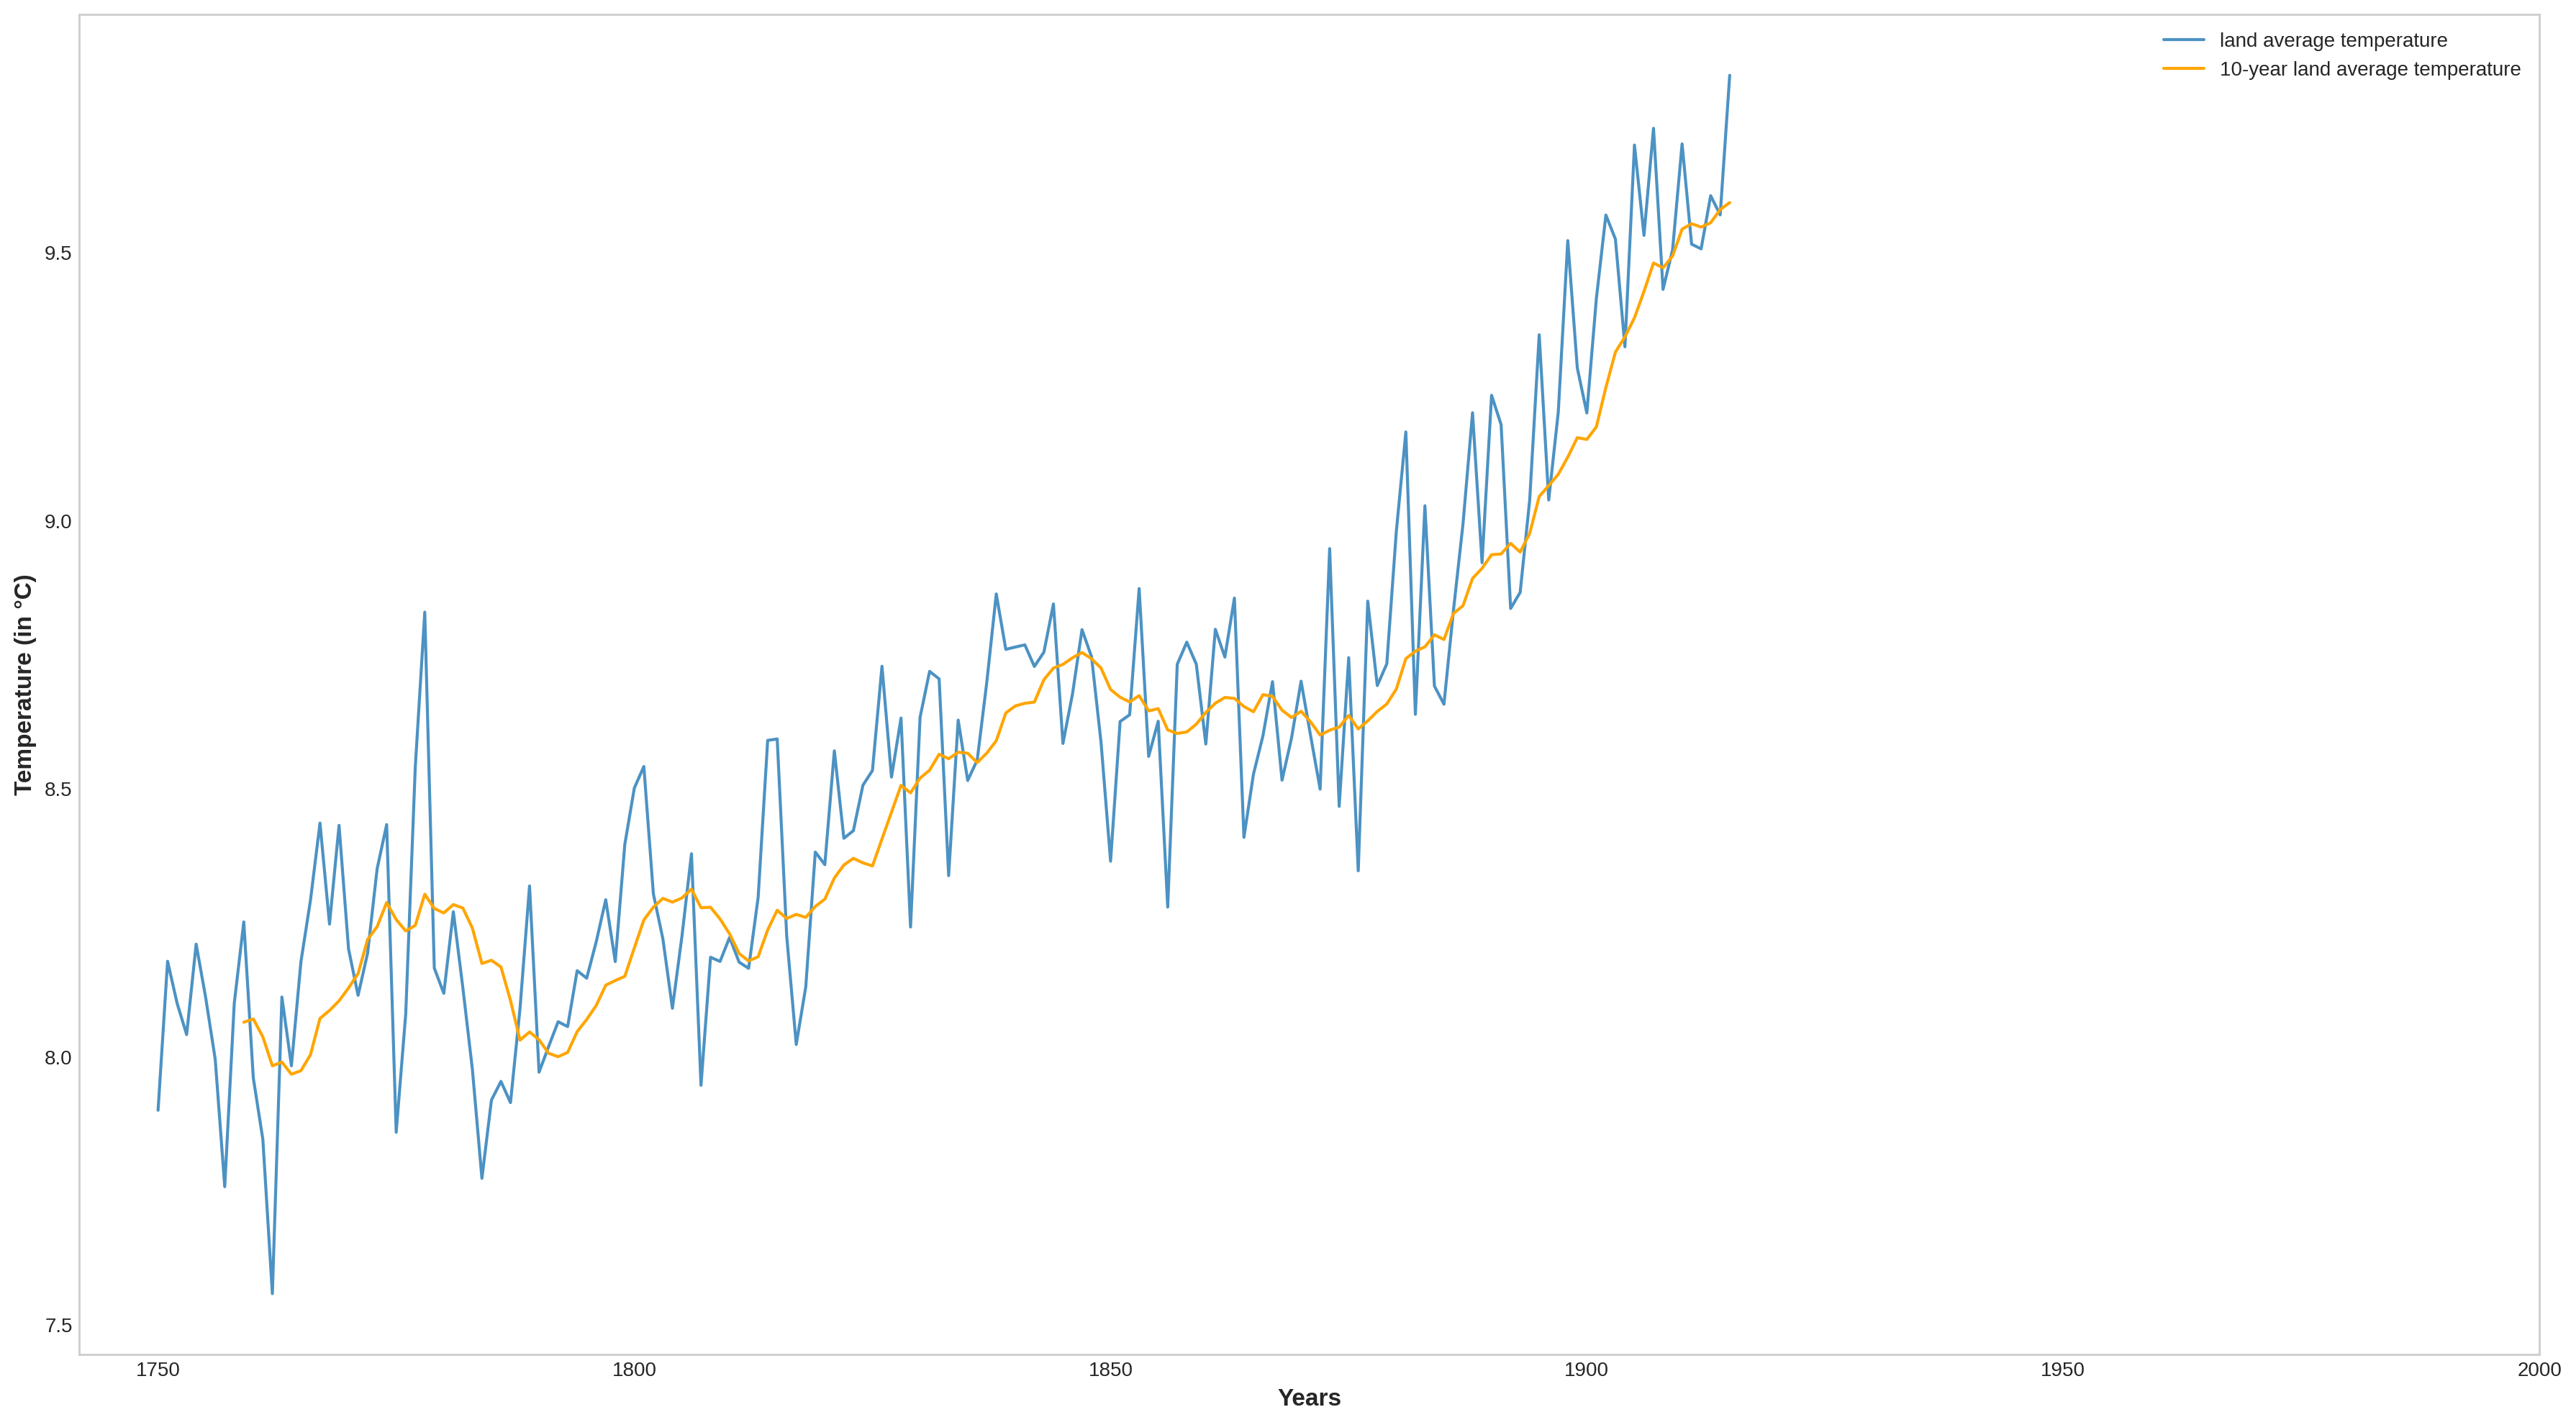

<Figure size 1100x400 with 0 Axes>

In [6]:
temperature_px = df['LandAverageTemperature']
df['10'] = temperature_px.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['LandAverageTemperature'], alpha=0.8, label='land average temperature')
ax.plot(df['10'], color="orange", label='10-year land average temperature')
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.grid()
plt.legend()
plt.show()
plt.clf()

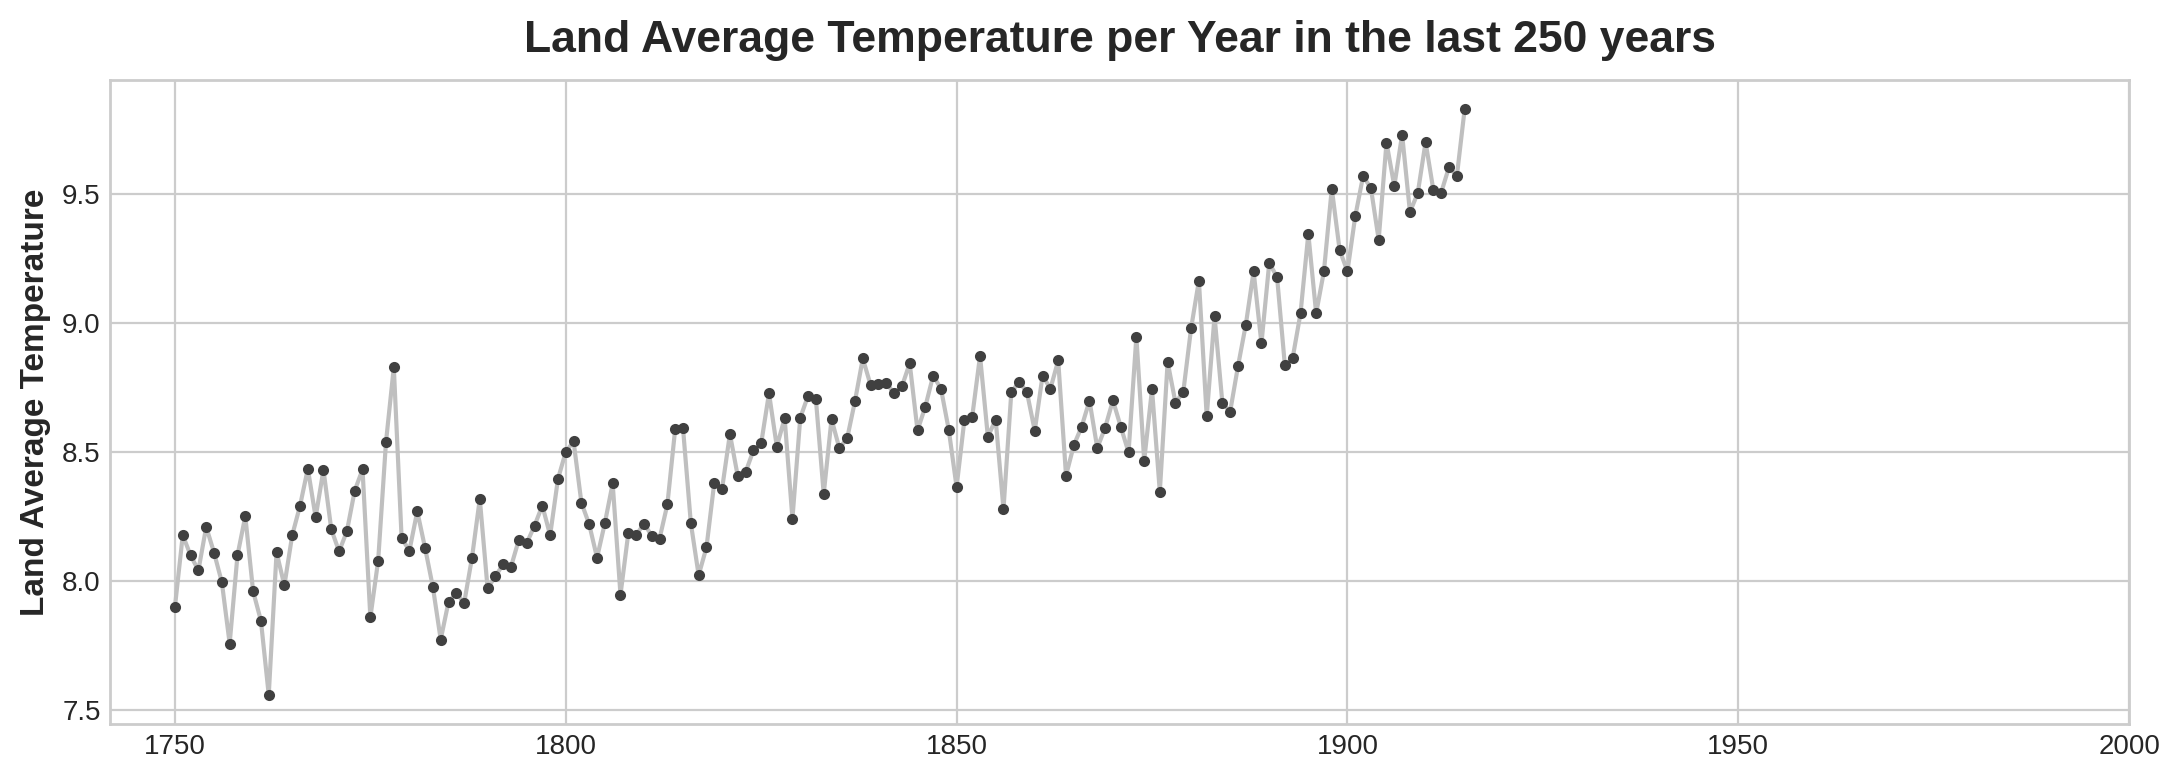

In [7]:
ax = df['LandAverageTemperature'].plot(**plot_params)
ax.set(title="Land Average Temperature per Year in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

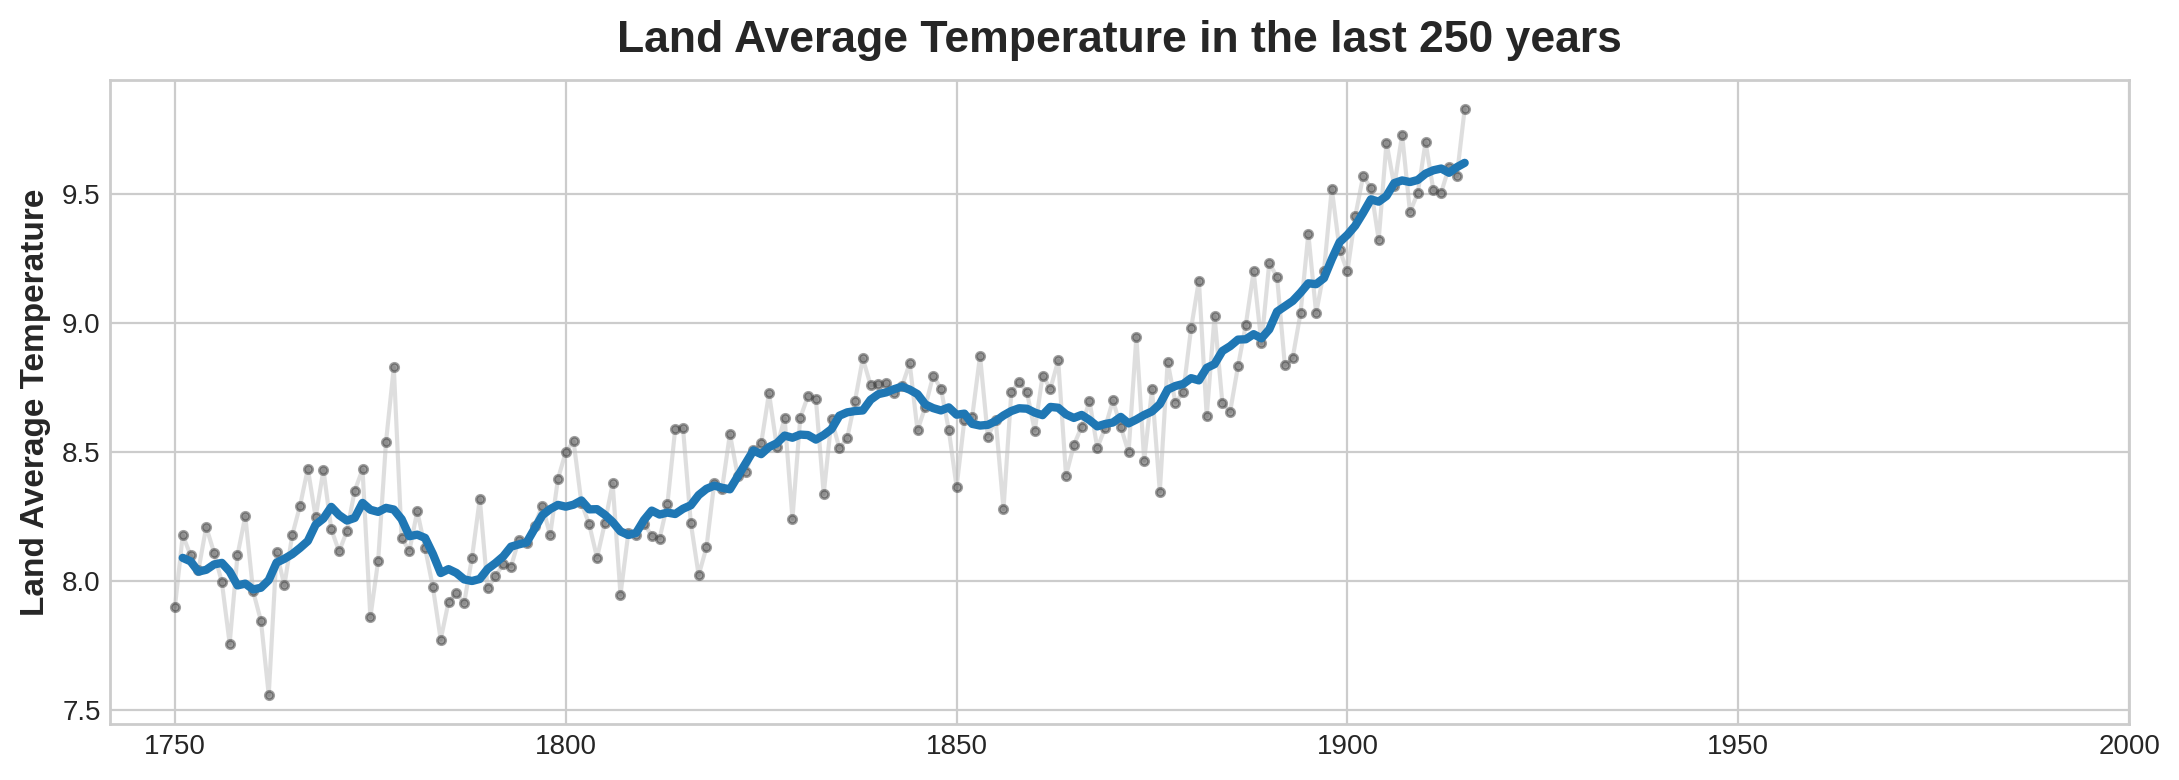

In [8]:
trend = df['LandAverageTemperature'].rolling(
    window=10,
    center=True,
    min_periods=6,
).mean()

ax = df['LandAverageTemperature'].plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
ax.set(title="Land Average Temperature in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

In [9]:
from statsmodels.tsa.deterministic import DeterministicProcess

average_temperature = temperatures.groupby('Year').mean()['LandAverageTemperature']
y = average_temperature.copy()  # the target

# YOUR CODE HERE: Instantiate `DeterministicProcess` with arguments
# appropriate for a cubic trend model
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)

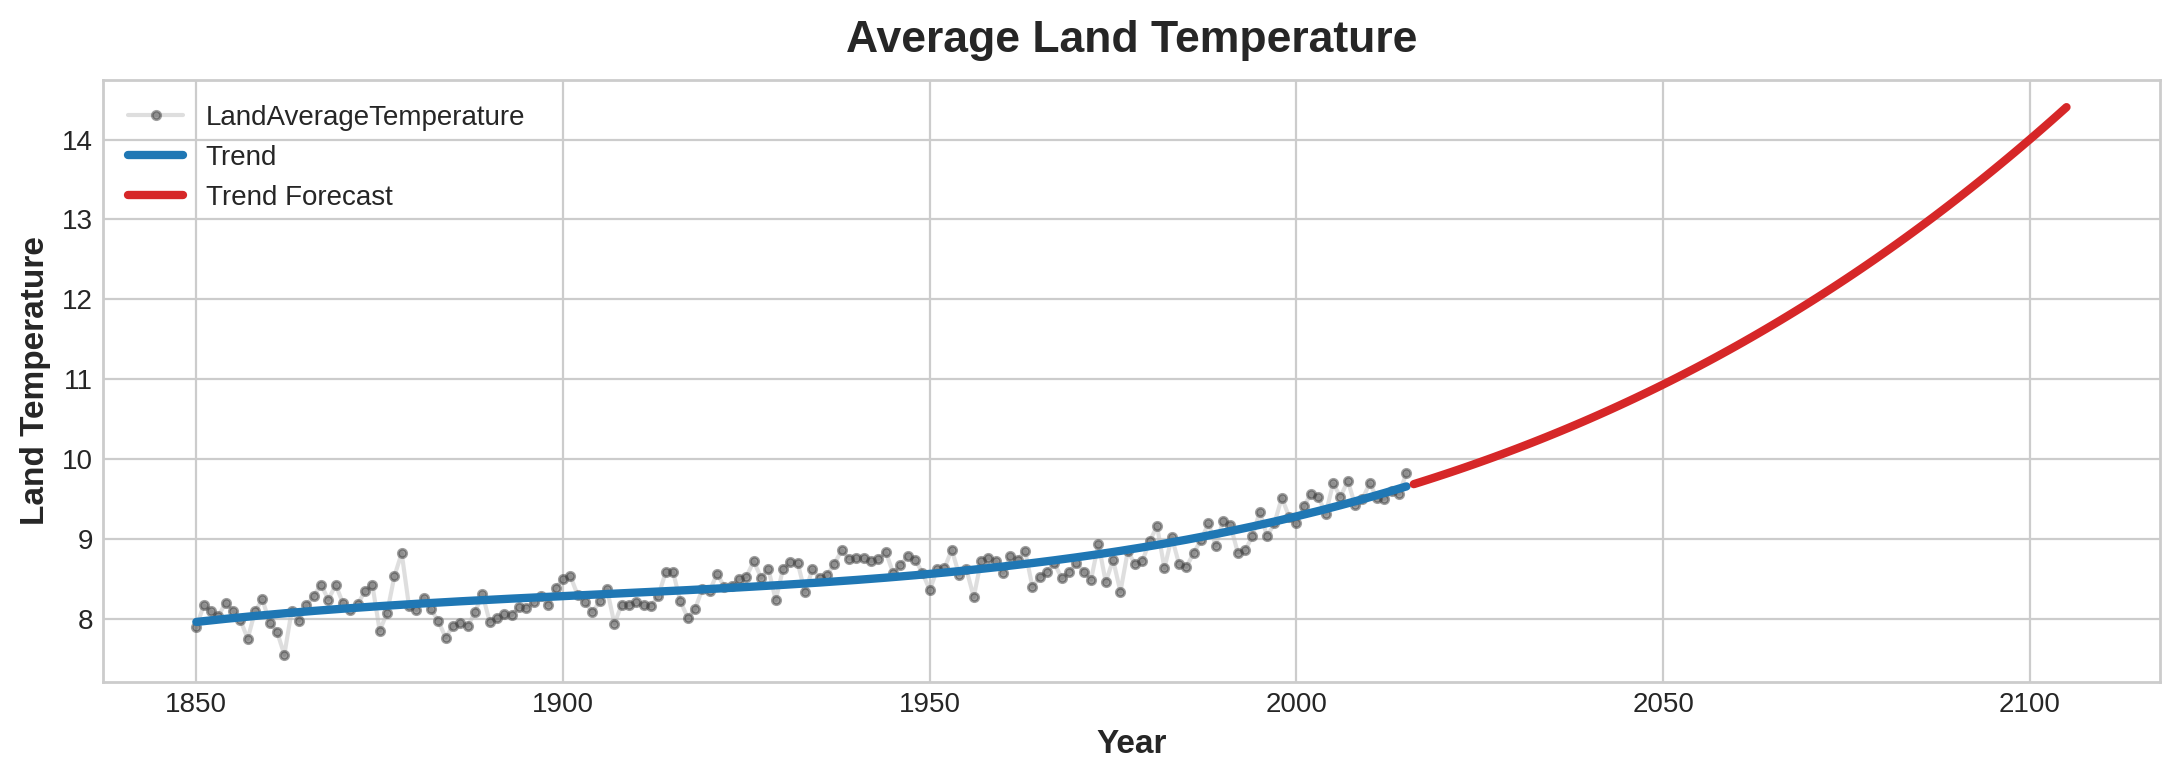

In [10]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Land Temperature", ylabel="Land Temperature")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

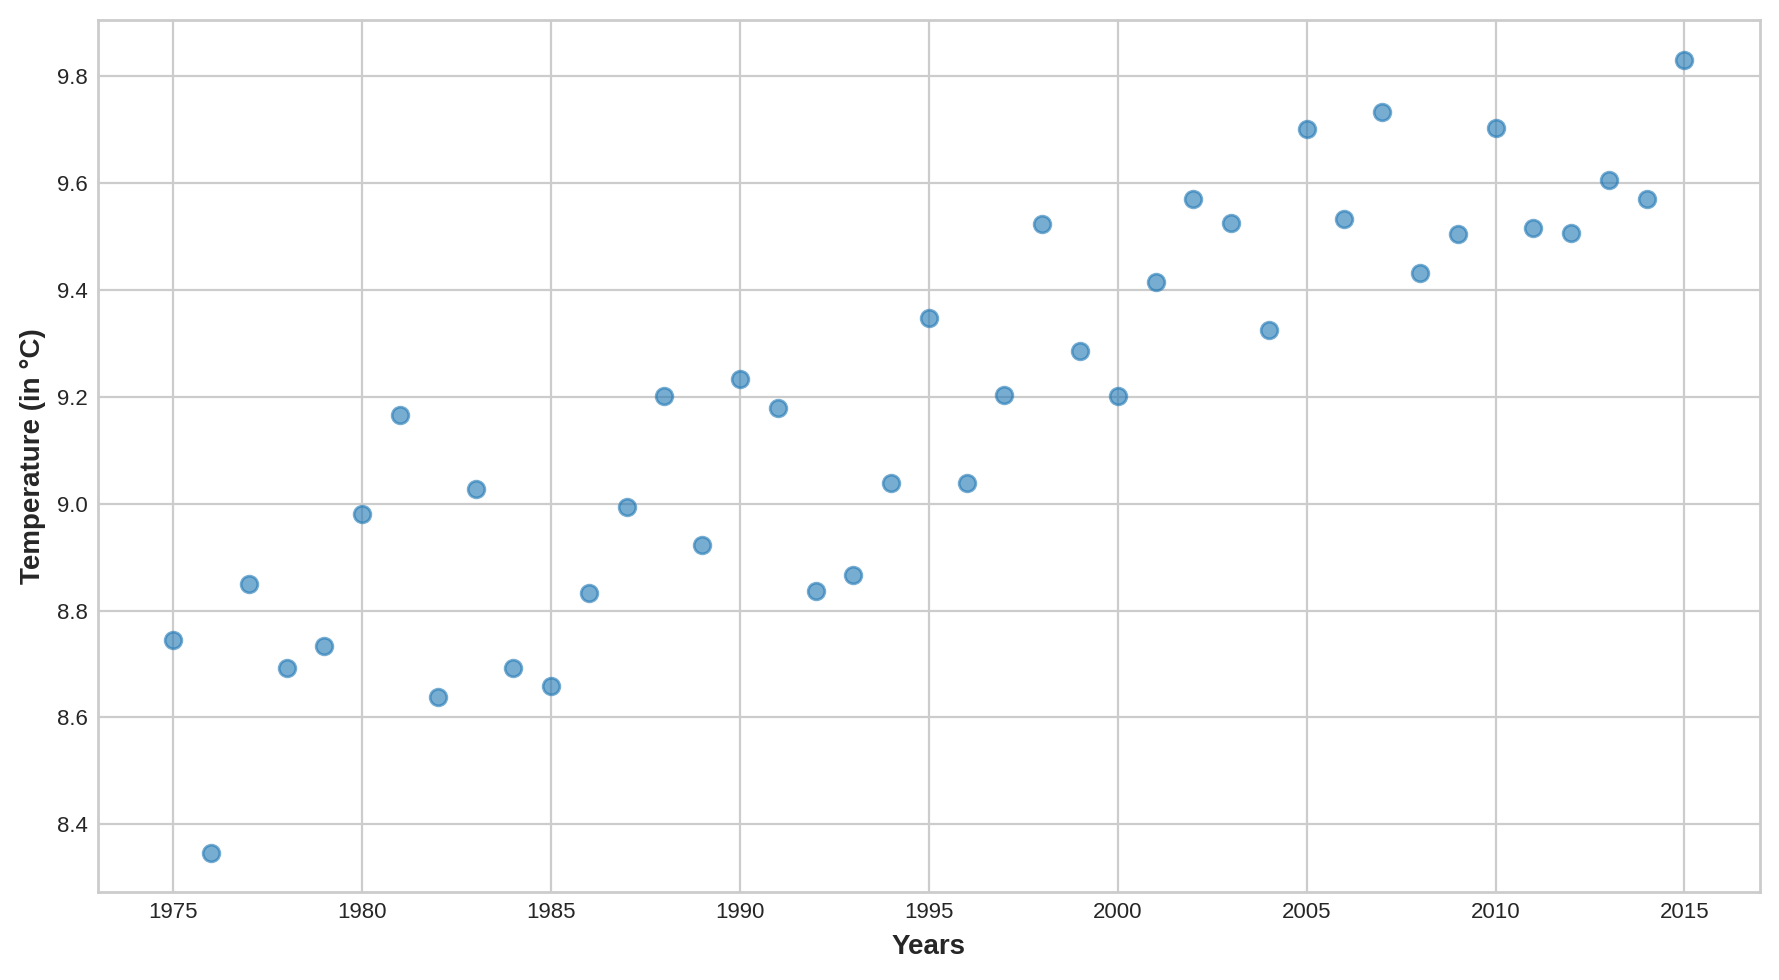

<Figure size 1100x400 with 0 Axes>

In [47]:
plt.figure(figsize=(9,5))
plt.scatter(X, y, alpha=0.6)
plt.xlabel('Years', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Temperature (in °C)', fontsize=10)
plt.show()
plt.clf()

In [43]:
corr, p = pearsonr(df[df['Year'] >= 1975]['Year'], df[df['Year'] >= 1975]['LandAverageTemperature'])
print('Tương quan Pearson giữa năm khảo sát và nhiệt độ trung bình: ' + str(corr))

Tương quan Pearson giữa năm khảo sát và nhiệt độ trung bình: 0.8870631726226292


In [27]:
X = df[df['Year'] >= 1975]['Year']
y = df[df['Year'] >= 1975]['LandAverageTemperature']
X = X.values.reshape(-1,1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.24340168698845277

In [32]:
y_pred = lr.predict(X)

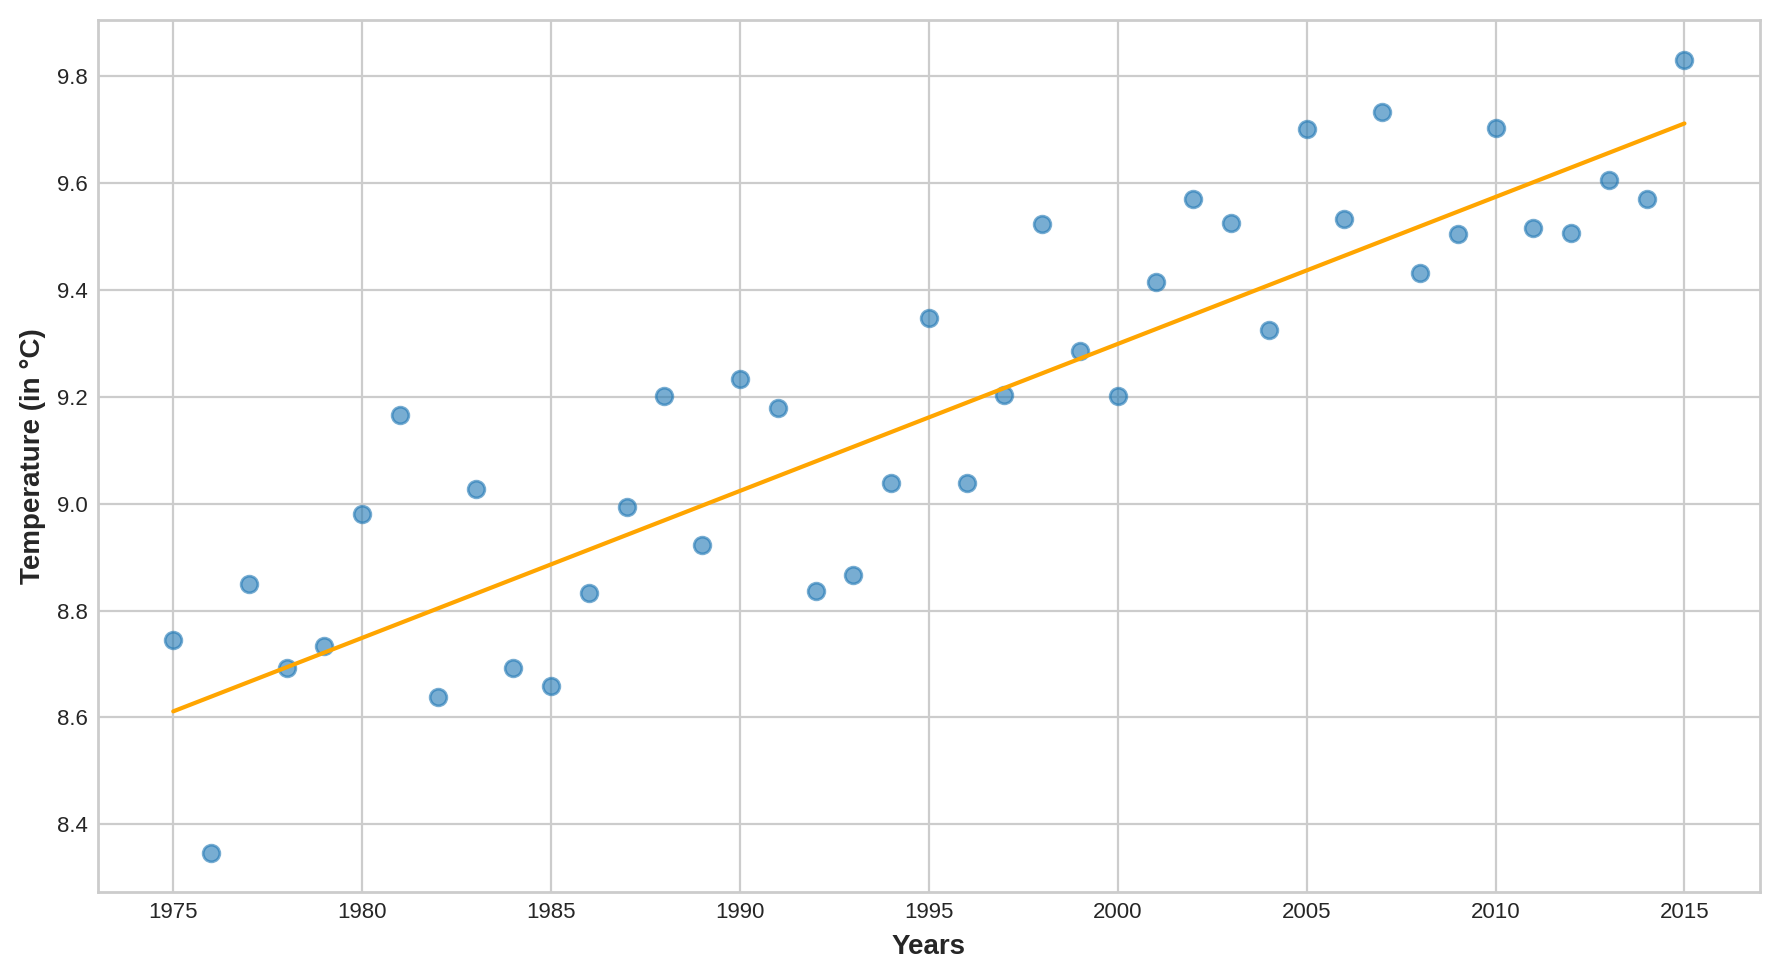

<Figure size 1100x400 with 0 Axes>

In [42]:
plt.figure(figsize=(9,5))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Temperature (in °C)', fontsize=10)
plt.show()
plt.clf()

In [19]:
print(lr.coef_)
print(lr.coef_ * 10)

[0.02748433]
[0.27484333]


In [48]:
print(lr.predict(np.array([2030, 2040, 2050]).reshape(-1,1)))

[10.12417022 10.39921621 10.67426219]
